<a href="https://colab.research.google.com/github/kanta0410/stock_price/blob/main/predict_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

何ができるのかをまずは知るノートブック


In [1]:
# 株価データを取得するライブラリ
!pip install yfinance
# データ分析とグラフ表示のライブラリ
!pip install pandas matplotlib

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier # 今回使うAIモデル
from sklearn.metrics import accuracy_score

In [4]:
# データをダウンロード
data = yf.download("^N225", start="2014-01-01")

# 「前日に比べて上がった(1)か、下がった(0)か」の正解ラベルを作る
data["Target"] = (data["Close"].shift(-1) > data["Close"]).astype(int)

# 必要なデータだけに絞る（始値、高値、安値、終値、出来高）
features = ["Open", "High", "Low", "Close", "Volume"]
data = data.dropna() # 空白のデータを消す

/tmp/ipython-input-2922484475.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("^N225", start="2014-01-01")
[*********************100%***********************]  1 of 1 completed


In [8]:
# 学習用（過去）とテスト用（直近）に分ける
train = data.iloc[:-100] # 最後から100日前まで
test = data.iloc[-100:]  # 直近100日間

# AIモデル（ランダムフォレスト）の設定
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=44)

# 学習実行
model.fit(train[features], train["Target"])

# 予測実行
preds = model.predict(test[features])
preds = pd.Series(preds, index=test.index)

# 正解率を表示
precision = accuracy_score(test["Target"], preds)
print(f"予測の正解率: {precision:.2%}")


予測の正解率: 44.00%


In [9]:
# 1. RSSリーダー（ニュースを読み込む道具）をインストール
!pip install feedparser

import feedparser
import pandas as pd
from datetime import datetime

# 2. ニュースを取得する関数を作成
def get_nikkei_news():
    # Googleニュースで「日経平均」を検索するRSSのURL
    # (ここを 'トヨタ' や '円安' に変えれば他のニュースも取れます)
    rss_url = "https://news.google.com/rss/search?q=日経平均&hl=ja&gl=JP&ceid=JP:ja"

    # ニュースを読み込む
    feed = feedparser.parse(rss_url)

    news_list = []

    # 取得したニュースをリストにまとめる
    for entry in feed.entries:
        news = {
            "title": entry.title,            # ニュースのタイトル
            "link": entry.link,              # 記事へのリンク
            "published": entry.published,    # 公開日時
            "source": entry.source.title     # ニュースの提供元（日経、Bloombergなど）
        }
        news_list.append(news)

    return pd.DataFrame(news_list)

# 3. 実行して結果を表示
df_news = get_nikkei_news()

# 取得したニュースの最初の5件を表示
print(f"取得したニュース件数: {len(df_news)}件")
df_news.head(10) # 10件表示

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.3 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=059b9032b0f10908b5615ec5e4ac8c5937427a43d5c8c0cf65d21f496fb84215
  Stored in directory: /root/.cache/pip/wheels/03/f5/1a/23761066dac1d0e8e683e5fdb27e12de53209d05a4a37e6246
Successfully built sgmllib3k
取得したニュース件数: 100件


,title,link,published,source
0,【市況】 伊藤智洋が読む「日経平均株価・短期シナリオ」 (1月9日記） - かぶたん,https://news.google.com/rss/articles/CBMiYEFVX...,"Thu, 08 Jan 2026 23:14:43 GMT",かぶたん
1,日経平均株価844円安 上がらぬ賃金、小売り決算に警戒感 - 日本経済新聞,https://news.google.com/rss/articles/CBMibEFVX...,"Thu, 08 Jan 2026 02:48:11 GMT",日本経済新聞
2,10時の日経平均は249円高の5万1366円、ファストリが388.27円押し上げ(株探ニュー...,https://news.google.com/rss/articles/CBMihwFBV...,"Fri, 09 Jan 2026 01:01:00 GMT",Yahoo!ファイナンス
3,日経平均は３１０円程度高、買い一巡後は伸び悩み＝９日前場 速報 - kabushiki.jp,https://news.google.com/rss/articles/CBMiR0FVX...,"Fri, 09 Jan 2026 01:11:00 GMT",kabushiki.jp
4,"（まとめ）日経平均は844円安の51,117円で続落 大引け後はファストリやイオンの決算発表...",https://news.google.com/rss/articles/CBMiVEFVX...,"Thu, 08 Jan 2026 07:26:00 GMT",マネクリ
5,日経平均は反発で寄り付く、自律反発狙いの買い優勢 - Reuters,https://news.google.com/rss/articles/CBMigAFBV...,"Fri, 09 Jan 2026 00:18:00 GMT",Reuters
6,日経平均株価 終値844円安の5万1117円 2日連続の値下がり - TBS NEWS DIG,https://news.google.com/rss/articles/CBMidEFVX...,"Thu, 08 Jan 2026 10:34:19 GMT",TBS NEWS DIG
7,異例中の異例で日経平均株価6万円を突破も？ 反落傾向の“午年相場”、今年の行方は - AER...,https://news.google.com/rss/articles/CBMiWkFVX...,"Thu, 08 Jan 2026 22:00:00 GMT",AERA DIGITAL
8,ちょっと難しい投資の専門用語「ロックアップ」「SQ」/日経平均最高値【今日の注目株＆日本株市...,https://news.google.com/rss/articles/CBMiU0FVX...,"Tue, 06 Jan 2026 10:00:00 GMT",ダイヤモンド・オンライン
9,日経平均は大幅続落、一時900円超安 ＡＩ株に利益確定売り - ニューズウィーク日本版 オフ...,https://news.google.com/rss/articles/CBMidEFVX...,"Thu, 08 Jan 2026 07:18:15 GMT",ニューズウィーク日本版 オフィシャルサイト


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 22.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=a47b05e5fe8992be5fc79df8ba6b0679298cf775dbf07ccf26cfc66f525245fc
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib


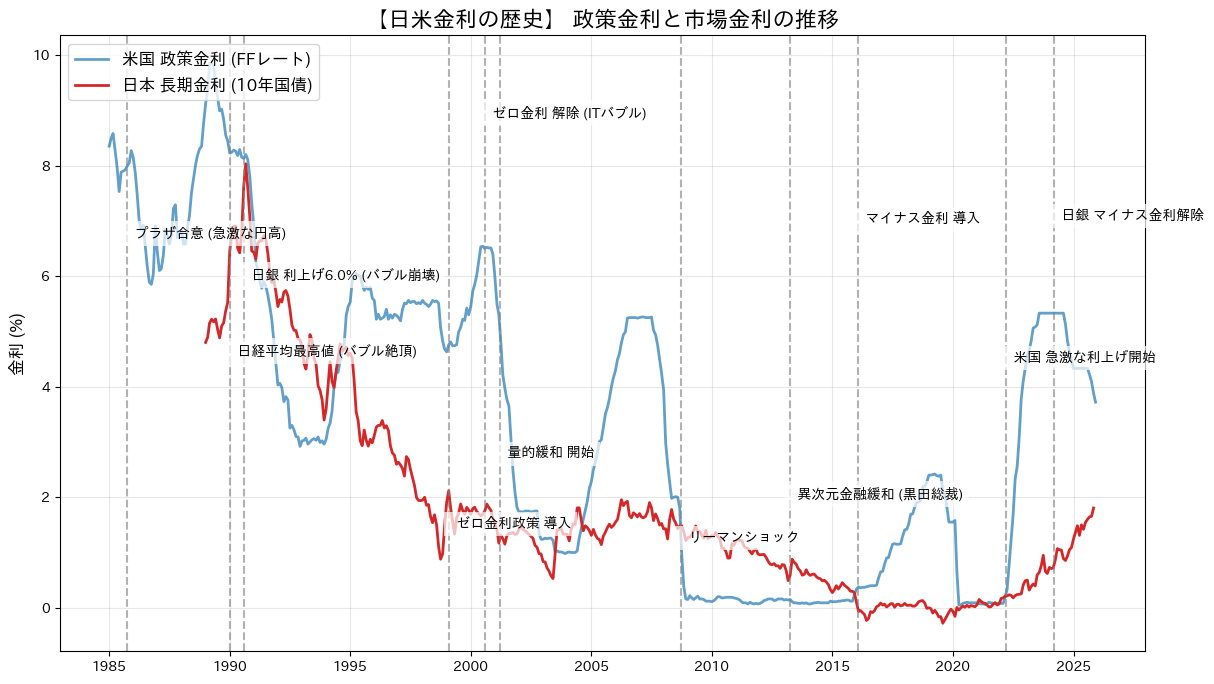

In [12]:
# 1. 日本語対応ライブラリをインストール（これだけで文字化けが直ります）
!pip install japanize-matplotlib
!pip install pandas_datareader

import japanize_matplotlib  # これをimportするだけでOK
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# ---------------------------------------------------------
# A. 歴史的イベントの定義
# ---------------------------------------------------------
major_events = [
    {"date": "1985-09-22", "event": "プラザ合意 (急激な円高)", "type": "為替"},
    {"date": "1989-12-29", "event": "日経平均最高値 (バブル絶頂)", "type": "市場"},
    {"date": "1990-08-01", "event": "日銀 利上げ6.0% (バブル崩壊)", "type": "金利"},
    {"date": "1999-02-12", "event": "ゼロ金利政策 導入", "type": "金利"},
    {"date": "2000-08-11", "event": "ゼロ金利 解除 (ITバブル)", "type": "金利"},
    {"date": "2001-03-19", "event": "量的緩和 開始", "type": "政策"},
    {"date": "2008-09-15", "event": "リーマンショック", "type": "ショック"},
    {"date": "2013-04-04", "event": "異次元金融緩和 (黒田総裁)", "type": "政策"},
    {"date": "2016-01-29", "event": "マイナス金利 導入", "type": "金利"},
    {"date": "2022-03-16", "event": "米国 急激な利上げ開始", "type": "米国金利"},
    {"date": "2024-03-19", "event": "日銀 マイナス金利解除", "type": "金利"}
]

df_events = pd.DataFrame(major_events)
df_events['date'] = pd.to_datetime(df_events['date'])

# ---------------------------------------------------------
# B. 金利データの取得 (名目金利)
# ---------------------------------------------------------
start_date = datetime.datetime(1985, 1, 1)
end_date = datetime.datetime.now()

# 米国：政策金利 (FFレート)
# 日本：長期金利 (10年国債利回り) ※動きが見やすいためこちらを採用
try:
    df_rates = web.DataReader(['FEDFUNDS', 'IRLTLT01JPM156N'], 'fred', start_date, end_date)
    df_rates.columns = ['米国_政策金利(FFレート)', '日本_長期金利(10年国債)'] # 日本語でカラム名をつける
except:
    print("データ取得エラー：ネットワークを確認してください")

# ---------------------------------------------------------
# C. グラフ描画
# ---------------------------------------------------------
plt.figure(figsize=(14, 8)) # 少し縦長に見やすく

# データのプロット
plt.plot(df_rates.index, df_rates['米国_政策金利(FFレート)'], label='米国 政策金利 (FFレート)', alpha=0.7, linewidth=2)
plt.plot(df_rates.index, df_rates['日本_長期金利(10年国債)'], label='日本 長期金利 (10年国債)', color='#d62728', linewidth=2)

# イベントの縦線とテキスト
for date, event in zip(df_events['date'], df_events['event']):
    plt.axvline(x=date, color='gray', linestyle='--', alpha=0.6)

    # 文字が重ならないように高さをランダムにする
    import random
    y_pos = random.uniform(1, 9)

    # 日本語テキストを表示
    plt.text(date, y_pos, f"  {event}", rotation=0, fontsize=10,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title("【日米金利の歴史】 政策金利と市場金利の推移", fontsize=16)
plt.ylabel("金利 (%)", fontsize=12)
plt.legend(fontsize=12, loc="upper left")
plt.grid(True, alpha=0.3)

# 表示
plt.show()

In [13]:
import pandas as pd
from datetime import datetime

# ---------------------------------------------------------
# ゲームの「ステージ」となる期間を定義する
# ---------------------------------------------------------
# ここに「期間」と「シナリオ名」を追加していけばステージが増やせます
game_stages = [
    {
        "ID": 1,
        "シナリオ名": "ブラックマンデー",
        "開始日": "1987-10-01",
        "終了日": "1988-01-31",
        "特徴": "史上最大級の暴落。1日で株価が20%以上消える恐怖。",
        "難易度": "高"
    },
    {
        "ID": 2,
        "シナリオ名": "バブル崩壊と利上げ",
        "開始日": "1990-01-01",
        "終了日": "1990-12-31",
        "特徴": "日銀の金利引き上げにより、株価がズルズル下がり続ける。",
        "難易度": "中"
    },
    {
        "ID": 3,
        "シナリオ名": "ITバブル崩壊",
        "開始日": "2000-03-01",
        "終了日": "2001-09-30",
        "特徴": "ネット関連株の熱狂とその後の急落。",
        "難易度": "中"
    },
    {
        "ID": 4,
        "シナリオ名": "リーマンショック",
        "開始日": "2008-08-01",
        "終了日": "2009-03-31",
        "特徴": "100年に一度の金融危機。金融機関の破綻が連鎖する。",
        "難易度": "激ムズ"
    },
    {
        "ID": 5,
        "シナリオ名": "アベノミクス始動",
        "開始日": "2012-11-01",
        "終了日": "2013-05-31",
        "特徴": "異次元緩和により、株価が一直線に上がりまくるボーナスステージ。",
        "難易度": "低"
    },
    {
        "ID": 6,
        "シナリオ名": "トランプ大統領選（トランプ・ラリー）",
        "開始日": "2016-10-01",
        "終了日": "2017-03-31",
        "特徴": "「トランプが勝ったら暴落」という予想を裏切り、爆上げした相場。",
        "難易度": "高"
    },
    {
        "ID": 7,
        "シナリオ名": "コロナショック",
        "開始日": "2020-01-15",
        "終了日": "2020-06-30",
        "特徴": "未知のウイルスによる急落と、その後の急速なV字回復。",
        "難易度": "高"
    },
    {
        "ID": 8,
        "シナリオ名": "世界的なインフレと利上げ",
        "開始日": "2022-01-01",
        "終了日": "2022-12-31",
        "特徴": "米国が猛烈な勢いで金利を上げ、ハイテク株が売られた年。",
        "難易度": "中"
    }
]

# ---------------------------------------------------------
# 表（DataFrame）として整形して表示
# ---------------------------------------------------------
df_stages = pd.DataFrame(game_stages)

# 日付データとして扱えるように変換しておく（後の分析のため）
df_stages['開始日'] = pd.to_datetime(df_stages['開始日'])
df_stages['終了日'] = pd.to_datetime(df_stages['終了日'])

# 表示設定（文章が切れないようにする）
pd.set_option('display.max_colwidth', None)

# 表を表示
print("【株トレード追体験ゲーム：ステージ一覧】")
display(df_stages)

【株トレード追体験ゲーム：ステージ一覧】


,ID,シナリオ名,開始日,終了日,特徴,難易度
0,1,ブラックマンデー,1987-10-01,1988-01-31,史上最大級の暴落。1日で株価が20%以上消える恐怖。,高
1,2,バブル崩壊と利上げ,1990-01-01,1990-12-31,日銀の金利引き上げにより、株価がズルズル下がり続ける。,中
2,3,ITバブル崩壊,2000-03-01,2001-09-30,ネット関連株の熱狂とその後の急落。,中
3,4,リーマンショック,2008-08-01,2009-03-31,100年に一度の金融危機。金融機関の破綻が連鎖する。,激ムズ
4,5,アベノミクス始動,2012-11-01,2013-05-31,異次元緩和により、株価が一直線に上がりまくるボーナスステージ。,低
5,6,トランプ大統領選（トランプ・ラリー）,2016-10-01,2017-03-31,「トランプが勝ったら暴落」という予想を裏切り、爆上げした相場。,高
6,7,コロナショック,2020-01-15,2020-06-30,未知のウイルスによる急落と、その後の急速なV字回復。,高
7,8,世界的なインフレと利上げ,2022-01-01,2022-12-31,米国が猛烈な勢いで金利を上げ、ハイテク株が売られた年。,中


In [14]:
###どこまでのデータをとれるのか
import yfinance as yf
import pandas as pd

# 限界まで古く指定してみる（1920年から）
start_date_test = "1920-01-01"

# チェックしたい銘柄リスト
tickers = {
    "米国 ダウ平均 (^DJI)": "^DJI",
    "米国 S&P500 (^GSPC)": "^GSPC",
    "日本 日経平均 (^N225)": "^N225",
    "日本 トヨタ自動車 (7203.T)": "7203.T",
    "米国 コカコーラ (KO)": "KO",
    "為替 ドル円 (JPY=X)": "JPY=X"
}

print(f"【データ取得限界チェック】 (指定開始日: {start_date_test})\n")
print(f"{'銘柄名':<20} | {'実際のデータ開始日':<15} | {'取得できた期間'}")
print("-" * 60)

for name, ticker in tickers.items():
    try:
        # データを取得
        df = yf.download(ticker, start=start_date_test, progress=False)

        if not df.empty:
            # 実際に取れた一番古い日付
            actual_start = df.index[0].strftime('%Y-%m-%d')
            # 現在までの年数
            years = (pd.Timestamp.now() - df.index[0]).days / 365

            print(f"{name:<20} | {actual_start:<15} | 約 {years:.1f} 年分")
        else:
            print(f"{name:<20} | {'取得不可':<15} | -")

    except Exception as e:
        print(f"{name:<20} | {'エラー':<15} | {e}")

print("\n※ 日本の個別株が2000年頃なのは、データ提供元の仕様による限界です。")

【データ取得限界チェック】 (指定開始日: 1920-01-01)

銘柄名                  | 実際のデータ開始日       | 取得できた期間
------------------------------------------------------------


/tmp/ipython-input-1188241938.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date_test, progress=False)


米国 ダウ平均 (^DJI)       | 1992-01-02      | 約 34.0 年分


/tmp/ipython-input-1188241938.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date_test, progress=False)


米国 S&P500 (^GSPC)    | 1927-12-30      | 約 98.1 年分


/tmp/ipython-input-1188241938.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date_test, progress=False)


日本 日経平均 (^N225)      | 1965-01-05      | 約 61.1 年分


/tmp/ipython-input-1188241938.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date_test, progress=False)


日本 トヨタ自動車 (7203.T)   | 1999-05-06      | 約 26.7 年分


/tmp/ipython-input-1188241938.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date_test, progress=False)


KeyboardInterrupt: 

In [15]:
import yfinance as yf

# 1. 任天堂 (7974.T) のデータを取得
# interval="1d" で日足、"1wk" で週足になります
ticker = "7974.T"

print("--- 📥 日足データの取得中 ---")
# 期間を指定して日足を取得
df_daily = yf.download(ticker, start="2020-01-01", end="2023-12-31", interval="1d", progress=False)

# 中身を表示（Open:始値, High:高値, Low:安値, Close:終値, Volume:出来高）
print("\n【日足データ (Daily)】")
print(df_daily[['Open', 'High', 'Low', 'Close', 'Volume']].head())


print("\n--- 📥 週足データの取得中 ---")
# interval="1wk" に変更するだけ
df_weekly = yf.download(ticker, start="2020-01-01", end="2023-12-31", interval="1wk", progress=False)

print("\n【週足データ (Weekly)】")
print(df_weekly[['Open', 'High', 'Low', 'Close', 'Volume']].head())

--- 📥 日足データの取得中 ---


/tmp/ipython-input-1618874683.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_daily = yf.download(ticker, start="2020-01-01", end="2023-12-31", interval="1d", progress=False)



【日足データ (Daily)】
Price              Open         High          Low        Close    Volume
Ticker           7974.T       7974.T       7974.T       7974.T    7974.T
Date                                                                    
2020-01-06  3636.925929  3643.690729  3594.645925  3614.094727  11546000
2020-01-07  3639.463326  3678.360936  3626.779323  3631.007324  11676000
2020-01-08  3593.801001  3622.551409  3518.542580  3605.639404  14844000
2020-01-09  3682.589071  3686.817073  3649.610662  3668.213867  10308000
2020-01-10  3654.683906  3702.037515  3647.919104  3673.287109   8263000

--- 📥 週足データの取得中 ---

【週足データ (Weekly)】
Price              Open         High          Low        Close    Volume
Ticker           7974.T       7974.T       7974.T       7974.T    7974.T
Date                                                                    
2019-12-30  3718.104004  3718.104004  3718.104004  3718.104004         0
2020-01-06  3636.926061  3702.037269  3518.542046  3673.286865  5663

/tmp/ipython-input-1618874683.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_weekly = yf.download(ticker, start="2020-01-01", end="2023-12-31", interval="1wk", progress=False)


ここですべてのライブラリを学ぶ

In [18]:
# ==========================================
# 1. 必要なライブラリを一気にインストール
# ==========================================
# Colabに入っていないものをインストールします
!pip install yfinance mplfinance japanize-matplotlib lightgbm prophet ta

# ==========================================
# 2. まとめてインポート（準備完了）
# ==========================================
import yfinance as yf               # データ取得
import pandas as pd                 # データ加工
import numpy as np                  # 数値計算
import matplotlib.pyplot as plt     # 基本グラフ
import mplfinance as mpf            # 株価チャート
import japanize_matplotlib          # 日本語化
import ta                           # テクニカル分析
from prophet import Prophet         # 時系列予測AI
import lightgbm as lgb              # 高精度AI
from sklearn.model_selection import train_test_split # データ分割
from sklearn.metrics import accuracy_score           # 正解率チェック

# 準備完了の合図
print("✅ すべてのライブラリのインストールと読み込みが完了しました！")
print("   これでデータ取得、チャート表示、AI予測のすべてが可能です。")


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=834f52928ee5e12c8ed51c57fcaa75c9dbbc5ee9a987fac657e1e6bf2897cdcc
  Stored in directory: /root/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta
✅ すべてのライブラリのインストールと読み込みが完了しました！
   これでデータ取得、チャート表示、AI予測のすべてが可能です。


/tmp/ipython-input-2524763305.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="5y", interval="1wk", progress=False)


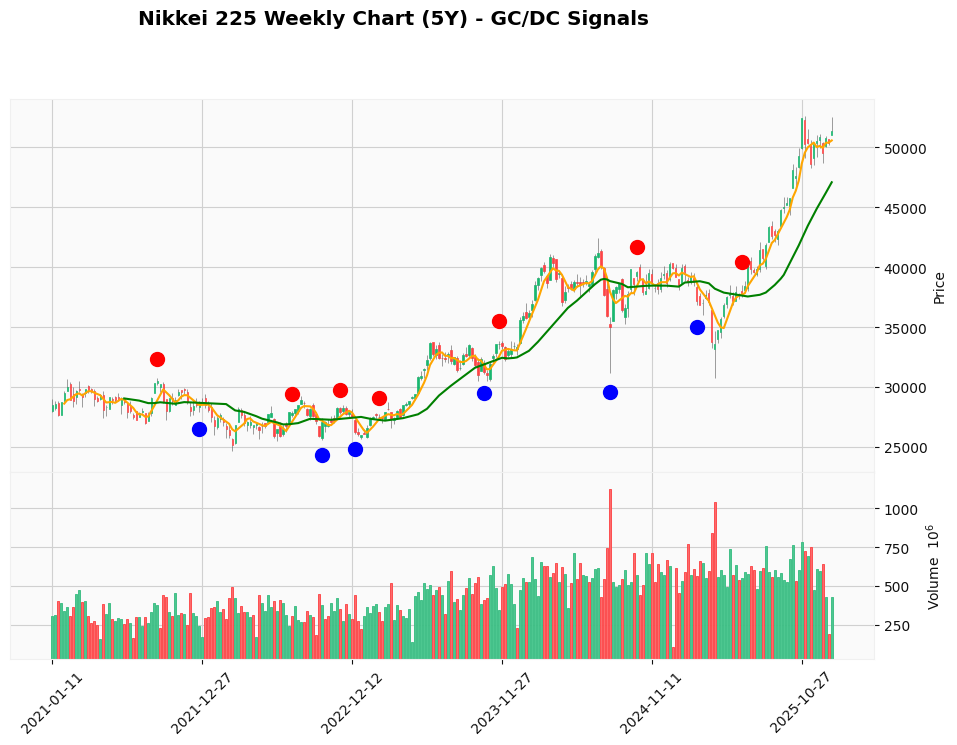

In [19]:
# 1. データの取得
ticker = "^N225"
df = yf.download(ticker, period="5y", interval="1wk", progress=False)

# =========================================================
# 【重要】ここが修正ポイント！ (データのクリーニング)
# =========================================================
# 1. もしカラムが2段組（MultiIndex）になっていたら1段に戻す
#    (最近のyfinanceは ("Open", "^N225") のようになることがあるため)
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# 2. 強制的にすべてのデータを「数値」に変換する
#    (文字が混ざっていたら NaN (空っぽ) にする)
cols = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 3. 空っぽのデータ（NaN）がある行を削除する
df = df.dropna()
# =========================================================

# --- ここからは以前と同じ計算処理 ---

# 2. テクニカル指標の計算
df['SMA5'] = df['Close'].rolling(window=5).mean()
df['SMA25'] = df['Close'].rolling(window=25).mean()

# 3. ゴールデンクロス・デッドクロスの判定
gc_condition = (df['SMA5'].shift(1) < df['SMA25'].shift(1)) & (df['SMA5'] > df['SMA25'])
dc_condition = (df['SMA5'].shift(1) > df['SMA25'].shift(1)) & (df['SMA5'] < df['SMA25'])

gc_points = [np.nan] * len(df)
dc_points = [np.nan] * len(df)

for i in range(len(df)):
    if gc_condition.iloc[i]:
        gc_points[i] = df['High'].iloc[i] * 1.05
    if dc_condition.iloc[i]:
        dc_points[i] = df['Low'].iloc[i] * 0.95

# 4. チャートの設定と描画
add_plots = [
    mpf.make_addplot(df['SMA5'], color='orange', width=1.5),
    mpf.make_addplot(df['SMA25'], color='green', width=1.5),
    mpf.make_addplot(gc_points, type='scatter', markersize=100, marker='o', color='red'),
    mpf.make_addplot(dc_points, type='scatter', markersize=100, marker='o', color='blue'),
]

mpf.plot(
    df,
    type='candle',
    style='yahoo',
    volume=True,
    addplot=add_plots,
    title=f"Nikkei 225 Weekly Chart (5Y) - GC/DC Signals",
    figsize=(12, 8),
    panel_ratios=(2, 1),
    datetime_format='%Y-%m-%d'
)

In [20]:
# 1. データ取得 (yfinance)
ticker = "^N225" # 日経平均
print("📥 データを取得中...")
df = yf.download(ticker, period="2y", interval="1d", progress=False)

# 2. データのお掃除 (pandas, numpy)
# (yfinanceの仕様変更対策：MultiIndexを解除して数値に直す)
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)
cols = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna()

# 3. テクニカル指標の爆速計算 (ta)
# 自分で計算式を書かなくても、これだけで計算してくれます！
import ta

# RSI (相対力指数) を追加
df['RSI'] = ta.momentum.rsi(df['Close'], window=14)

# ボリンジャーバンドを追加
indicator_bb = ta.volatility.BollingerBands(close=df['Close'], window=20, window_dev=2)
df['BB_High'] = indicator_bb.bollinger_hband()
df['BB_Low'] = indicator_bb.bollinger_lband()

print("✅ STEP 1 完了: テクニカル指標の計算が終わりました")
df[['Close', 'RSI', 'BB_High']].tail()

📥 データを取得中...
✅ STEP 1 完了: テクニカル指標の計算が終わりました


/tmp/ipython-input-3896184957.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="2y", interval="1d", progress=False)


Price,Close,RSI,BB_High
Date,,,
2025-12-30,50339.480469,52.555576,51287.277011
2026-01-05,51832.800781,62.982184,51576.918746
2026-01-06,52518.078125,66.608698,51951.305416
2026-01-07,51961.980469,61.355749,52166.054559
2026-01-09,51437.300781,56.803993,52258.596007


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32076 (\N{CJK UNIFIED IDEOGRAPH-7D4C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

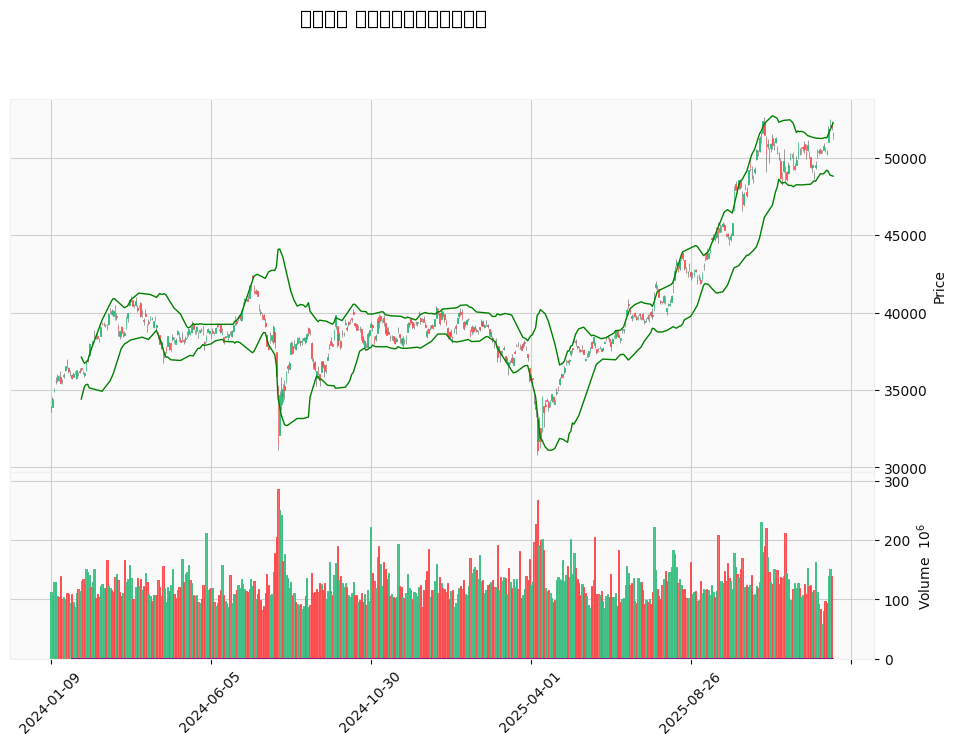

✅ STEP 2 完了: チャートが表示されました


In [21]:
# チャート設定 (mplfinance)
# ボリンジャーバンドをチャートに重ねて表示する設定
add_plots = [
    mpf.make_addplot(df['BB_High'], color='green', width=1), # 上のバンド
    mpf.make_addplot(df['BB_Low'], color='green', width=1),  # 下のバンド
    mpf.make_addplot(df['RSI'], panel=1, color='purple', ylabel='RSI') # 下段にRSI
]

# 描画
mpf.plot(
    df,
    type='candle',        # ローソク足
    style='yahoo',
    volume=True,          # 出来高
    addplot=add_plots,    # 追加指標
    title="日経平均 テクニカル分析チャート",
    figsize=(12, 8),
    panel_ratios=(2, 1),  # 株価とRSIの比率
    datetime_format='%Y-%m-%d'
)
print("✅ STEP 2 完了: チャートが表示されました")

In [27]:
# 1. まずはインストール（文字化け直すやつ + チャート描くやつ）
!pip install japanize-matplotlib mplfinance

# 2. インポート（これをするだけで日本語が表示されるようになります）
import japanize_matplotlib  # ← これが魔法のライブラリ
import mplfinance as mpf
import pandas as pd

# 完了メッセージ
print("✅ 日本語化ライブラリの読み込み完了！")
print("   これでチャートのタイトルに『日経平均』とか入れても文字化けしません。")

✅ 日本語化ライブラリの読み込み完了！
   これでチャートのタイトルに『日経平均』とか入れても文字化けしません。


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12395 (\N{HIRAGANA LETTER NI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12424 (\N{HIRAGANA LETTER YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12427 (\N{HIRAGANA LETTER RU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21521 (\N{CJK UNIFIED IDEOGRAPH-5411}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12371 (\N{HIRAGANA LETTER KO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

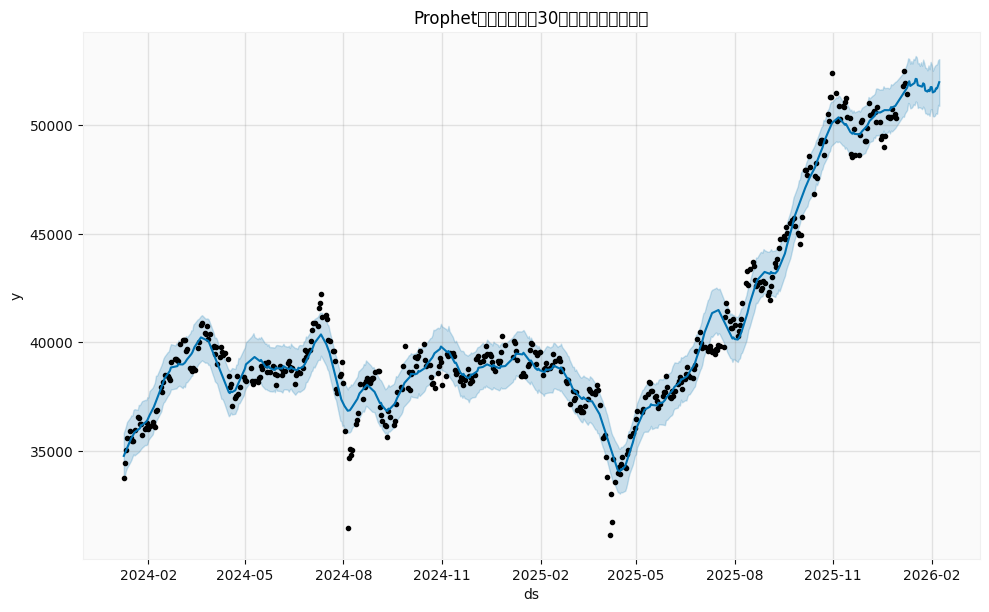

✅ STEP 3 完了: 黒い点が実績、青い線がAIの予測です


In [26]:
# Prophet用にデータを整形 (日付を'ds', 終値を'y'という名前にする必要がある)
df_prophet = df.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# 1. AIモデルの作成と学習 (Prophet)
model_prophet = Prophet(daily_seasonality=True)
model_prophet.fit(df_prophet)

# 2. 未来の日付を作成 (向こう30日分)
future = model_prophet.make_future_dataframe(periods=30)

# 3. 予測実行
forecast = model_prophet.predict(future)

# 4. 結果の表示 (Prophet内蔵のグラフ機能)
fig1 = model_prophet.plot(forecast)
plt.title("Prophetによる向こう30日間のトレンド予測")
plt.show()

print("✅ STEP 3 完了: 黒い点が実績、青い線がAIの予測です")

📈 LightGBMの予測正解率: 48.42%


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35222 (\N{CJK UNIFIED IDEOGRAPH-8996}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

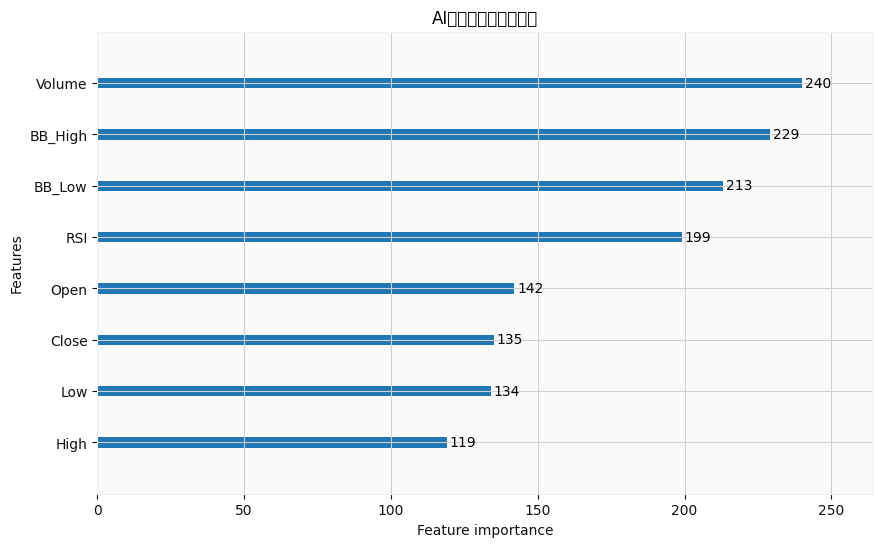

✅ STEP 4 完了: AIモデルの構築が終わりました


In [25]:
# 1. 特徴量（AIへのヒント）を作る
df_ai = df.copy()
df_ai['Return'] = df_ai['Close'].pct_change() # 変化率
df_ai['Target'] = (df_ai['Close'].shift(-1) > df_ai['Close']).astype(int) # 翌日上がるなら1、下がるなら0
df_ai = df_ai.dropna()

# 学習に使うデータ (RSIなどの指標もヒントにする)
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'BB_High', 'BB_Low']
X = df_ai[features]
y = df_ai['Target']

# 2. データを分割 (sklearn)
# 過去80%で勉強して、最新20%でテストする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 3. 最強モデル LightGBM の構築と学習 (lightgbm)
model_lgb = lgb.LGBMClassifier(random_state=42, verbose=-1) # verbose=-1で警告を消す
model_lgb.fit(X_train, y_train)

# 4. 予測精度チェック
accuracy = model_lgb.score(X_test, y_test)
print(f"📈 LightGBMの予測正解率: {accuracy:.2%}")

# 5. どのデータが重要だったかを見る
lgb.plot_importance(model_lgb, figsize=(10, 6), title="AIが重要視したデータ")
plt.show()

print("✅ STEP 4 完了: AIモデルの構築が終わりました")


In [24]:
# 1. まずはインストール（文字化け直すやつ + チャート描くやつ）
!pip install japanize-matplotlib mplfinance

# 2. インポート（これをするだけで日本語が表示されるようになります）
import japanize_matplotlib  # ← これが魔法のライブラリ
import mplfinance as mpf
import pandas as pd

# 完了メッセージ
print("✅ 日本語化ライブラリの読み込み完了！")
print("   これでチャートのタイトルに『日経平均』とか入れても文字化けしません。")

✅ 日本語化ライブラリの読み込み完了！
   これでチャートのタイトルに『日経平均』とか入れても文字化けしません。


この下はゲームを作る


In [29]:
# ==========================================
# 時間経過システム（Time Engine）のプロトタイプ
# ==========================================

import time
import pandas as pd
import yfinance as yf
import ipywidgets as widgets
from IPython.display import display, clear_output

# 1. データの準備（今回はテスト用に日経平均の直近1年分を使います）
print("データをダウンロード中...")
df = yf.download("^N225", period="1y", interval="1d", progress=False)
if isinstance(df.columns, pd.MultiIndex): # データ整形
    df.columns = df.columns.get_level_values(0)
print("準備完了！")

# ---------------------------------------------------------
# 2. ゲームのコントローラーを作る（ボタンとスライダー）
# ---------------------------------------------------------

# 再生・一時停止ボタン
play_button = widgets.ToggleButton(
    value=False,
    description='再生/一時停止',
    button_style='success', # 緑色
    icon='play'
)

# スピード調整スライダー（1日が何秒で進むか）
# 小さい数字ほど速い（0.1秒 = 爆速、1.0秒 = ゆっくり）
speed_slider = widgets.FloatSlider(
    value=0.5,
    min=0.05,
    max=2.0,
    step=0.05,
    description='1日の秒数:',
    continuous_update=False
)

# 情報を表示するエリア（ここがゲーム画面になります）
output_area = widgets.Output()

# コントローラーを表示
display(widgets.HBox([play_button, speed_slider]))
display(output_area)

# ---------------------------------------------------------
# 3. ゲームループ（心臓部）
# ---------------------------------------------------------
def game_loop():
    # データの日付と価格を順番に取り出す
    for date, row in df.iterrows():

        # ■ 一時停止ロジック
        # ボタンが「押されていない（False）」間は、ここで無限ループして止まる
        while not play_button.value:
            with output_area:
                clear_output(wait=True)
                print(f"⏸️ ゲーム一時停止中... （再生ボタンを押してスタート）")
                print(f"現在の設定速度: 1日あたり {speed_slider.value} 秒")
            time.sleep(0.5) # 負荷を下げるために少し待つ

        # ■ 画面更新（1日経過）
        with output_area:
            clear_output(wait=True) # 前の画面を消す

            # --- ここにゲーム画面（UI）を描画 ---
            str_date = date.strftime('%Y年%m月%d日')
            price = int(row['Close'])

            print(f"📅 日付: {str_date}")
            print(f"💰 株価: {price:,} 円")
            print("-" * 30)
            print("進行中... ⏩")
            # -----------------------------------

        # ■ 速度調整（スライダーの値だけ待つ）
        time.sleep(speed_slider.value)

    # ループ終了後
    with output_area:
        print("🎉 シミュレーション終了！")

# ゲーム開始！
game_loop()

データをダウンロード中...
準備完了！


/tmp/ipython-input-4099353128.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("^N225", period="1y", interval="1d", progress=False)


Output()

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import yfinance as yf
import ipywidgets as widgets
from IPython.display import display, clear_output
import time

# =========================================================
# 🏗️ プロ級設計：クラス（設計図）の定義
# =========================================================

class NewsDirector:
    """
    ニュースを管理し、適切なタイミングで配信する監督（クラス）
    """
    def __init__(self):
        # コンストラクタ（初期化）：ロボットが作られた時に最初にやること
        # ここに「予定されているニュース」を全部登録しておく
        self.news_database = [
            {"date": "2023-04-28", "title": "【速報】日銀、金融緩和の維持を決定", "impact": "neutral"},
            {"date": "2023-05-19", "title": "【好材料】日経平均、バブル後最高値を更新！", "impact": "high"},
            {"date": "2023-07-28", "title": "【重要】YCC修正案が浮上、金利上昇の懸念", "impact": "bad"},
            {"date": "2023-10-04", "title": "【急落】米国金利上昇を嫌気して大幅安", "impact": "bad"},
            # ※本来はここに何百個ものデータが入ります
        ]

    def check_news(self, current_date):
        """
        今日の日付を受け取って、ニュースがあれば返すメソッド（機能）
        """
        # 日付を文字列に変換 (例: 2023-05-19)
        str_date = current_date.strftime('%Y-%m-%d')

        # データベースから今日の日付と一致するニュースを探す
        found_news = []
        for news in self.news_database:
            if news["date"] == str_date:
                found_news.append(news)

        return found_news

# =========================================================
# 🎮 ゲーム実行部分
# =========================================================

# 1. データの準備
print("データをロード中...")
df = yf.download("^N225", start="2023-04-01", end="2023-12-31", progress=False)
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# 2. クラスの「実体化（インスタンス化）」
# 設計図(Class)から、実際に働くロボット(Instance)を生み出す
director = NewsDirector()

# 3. UIの準備
play_button = widgets.ToggleButton(description='再生', icon='play')
output_area = widgets.Output()

display(play_button, output_area)

# 4. ゲームループ
def run_game():
    for date, row in df.iterrows():
        # 再生ボタン待ち
        while not play_button.value:
            time.sleep(0.5)

        with output_area:
            clear_output(wait=True)

            # --- A. ニュース監督に「今日ニュースある？」と聞く ---
            todays_news = director.check_news(date)

            # --- B. 画面描画 ---
            str_date = date.strftime('%Y年%m月%d日')
            price = int(row['Close'])

            # ヘッダー表示
            print(f"📅 {str_date}  |  💰 日経平均: {price:,} 円")
            print("="*60)

            # ニュースがあれば派手に表示
            if len(todays_news) > 0:
                print("\n🚨 NEWS FLASH!! 🚨")
                for news in todays_news:
                    # ニュースの種類によって記号を変える演出
                    icon = "📈" if news['impact'] == "high" else "📉" if news['impact'] == "bad" else "📢"
                    print(f"{icon} {news['title']}")
                print("\n" + "="*60)
            else:
                print("\n(今日は特別なニュースはありません)")

            # --- C. 時間経過 ---
            time.sleep(1.0) # 1秒待機

# ボタンが押されたらスタートするように設定
# （Colabの仕様上、関数を直接呼ぶ形にします）
print("再生ボタンを押すとスタートします")
run_game()

データをロード中...


/tmp/ipython-input-4095780151.py:47: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("^N225", start="2023-04-01", end="2023-12-31", progress=False)


ToggleButton(value=False, description='再生', icon='play')

Output()

再生ボタンを押すとスタートします
